In [39]:

# File: 05_revenue_scoring.ipynb
# Purpose: Calculate and visualize revenue scoring to identify top listings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc

In [41]:
df = pd.read_csv('cleaned_airbnb.csv')

# Calculate revenue score
df['revenue_score'] = df['price'] * df['reviews_per_month'] * (df['availability_365'] / 365)

In [42]:

# Top 10 listings by revenue score
top10 = df[['id', 'name', 'neighbourhood_group', 'room_type', 'price', 'revenue_score']].sort_values(by='revenue_score', ascending=False).head(10)



In [49]:

# Connect to SQL Server
conn = pyodbc.connect(
    r'DRIVER=ODBC Driver 17 for SQL Server;'
    r'SERVER=localhost\SQLEXPRESS;'
    r'DATABASE=AirbnbNYC;'
    r'Trusted_Connection=yes;',
)

# Query the cleaned table
query = "SELECT * FROM airbnb_cleaned"

# Load into DataFrame
df = pd.read_sql(query, conn)

# Close the connection
conn.close()  

# Confirm it's loaded
print(df['neighbourhood_group'].unique())


['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']


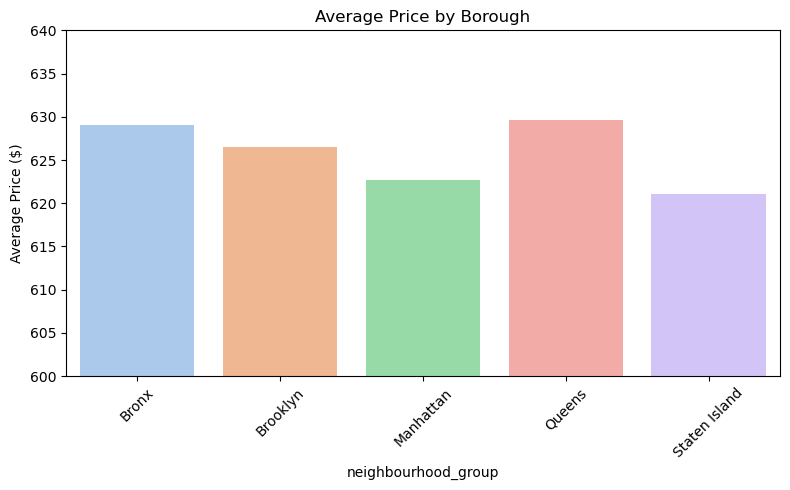

In [51]:
# Plot top revenue listings

# Calculate average price per borough
avg_price_df = df.groupby('neighbourhood_group', as_index=False)['price'].mean()

# Rename column for clarity
avg_price_df = avg_price_df.rename(columns={'price': 'avg_price'})

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_price_df, x='neighbourhood_group', y='avg_price', hue='neighbourhood_group', palette='pastel', legend=False)
plt.title('Average Price by Borough')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.ylim(600, 640)
plt.tight_layout()
plt.savefig('avg_price_by_borough.png')
plt.show()


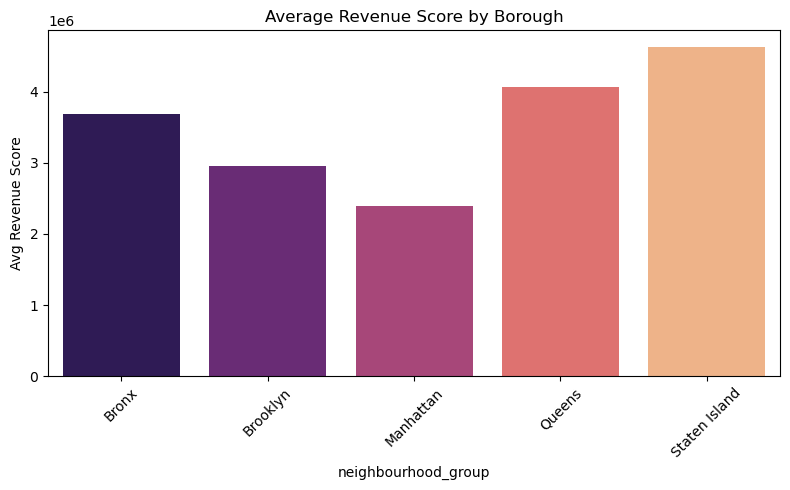

In [57]:
# Avg revenue score by borough
df['revenue_score'] = df['price'] * df['availability_365'] * df['number_of_reviews']
revenue_df = df.groupby('neighbourhood_group', as_index=False)['revenue_score'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(data=revenue_df, x='neighbourhood_group', y='revenue_score', palette='magma')
plt.title('Average Revenue Score by Borough')
plt.ylabel('Avg Revenue Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('revenue_score_by_borough.png')
plt.show()

